In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X = df.iloc[:,:8]
y = df.iloc[:,-1]

In [6]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [9]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
262,4,95,70,32,0,32.1,0.612,24
619,0,119,0,0,0,32.4,0.141,24
275,2,100,70,52,57,40.5,0.677,25
338,9,152,78,34,171,34.2,0.893,33
177,0,129,110,46,130,67.1,0.319,26
...,...,...,...,...,...,...,...,...
360,5,189,64,33,325,31.2,0.583,29
709,2,93,64,32,160,38.0,0.674,23
439,6,107,88,0,0,36.8,0.727,31
174,2,75,64,24,55,29.7,0.370,33


# Modelling without Hyper-parameter Tuning

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
# Model without hyper-parameter tuning

model1 = DecisionTreeClassifier(random_state=11)

In [12]:
model1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [13]:
y_pred = model1.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7316017316017316

In [15]:
from sklearn.tree import plot_tree

[Text(2212.206081081081, 2627.4, 'X[1] <= 127.5\ngini = 0.456\nsamples = 537\nvalue = [348, 189]'),
 Text(1095.2635135135135, 2446.2, 'X[7] <= 28.5\ngini = 0.333\nsamples = 346\nvalue = [273, 73]'),
 Text(512.7567567567568, 2265.0, 'X[5] <= 49.1\ngini = 0.142\nsamples = 195\nvalue = [180, 15]'),
 Text(392.1081081081081, 2083.8, 'X[0] <= 7.5\ngini = 0.126\nsamples = 192\nvalue = [179, 13]'),
 Text(331.78378378378375, 1902.6, 'X[5] <= 30.95\ngini = 0.118\nsamples = 191\nvalue = [179, 12]'),
 Text(120.64864864864865, 1721.4, 'X[6] <= 0.668\ngini = 0.018\nsamples = 112\nvalue = [111, 1]'),
 Text(60.32432432432432, 1540.2, 'gini = 0.0\nsamples = 96\nvalue = [96, 0]'),
 Text(180.97297297297297, 1540.2, 'X[6] <= 0.686\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(120.64864864864865, 1359.0, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(241.2972972972973, 1359.0, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(542.918918918919, 1721.4, 'X[2] <= 22.0\ngini = 0.24\nsamples = 79\n

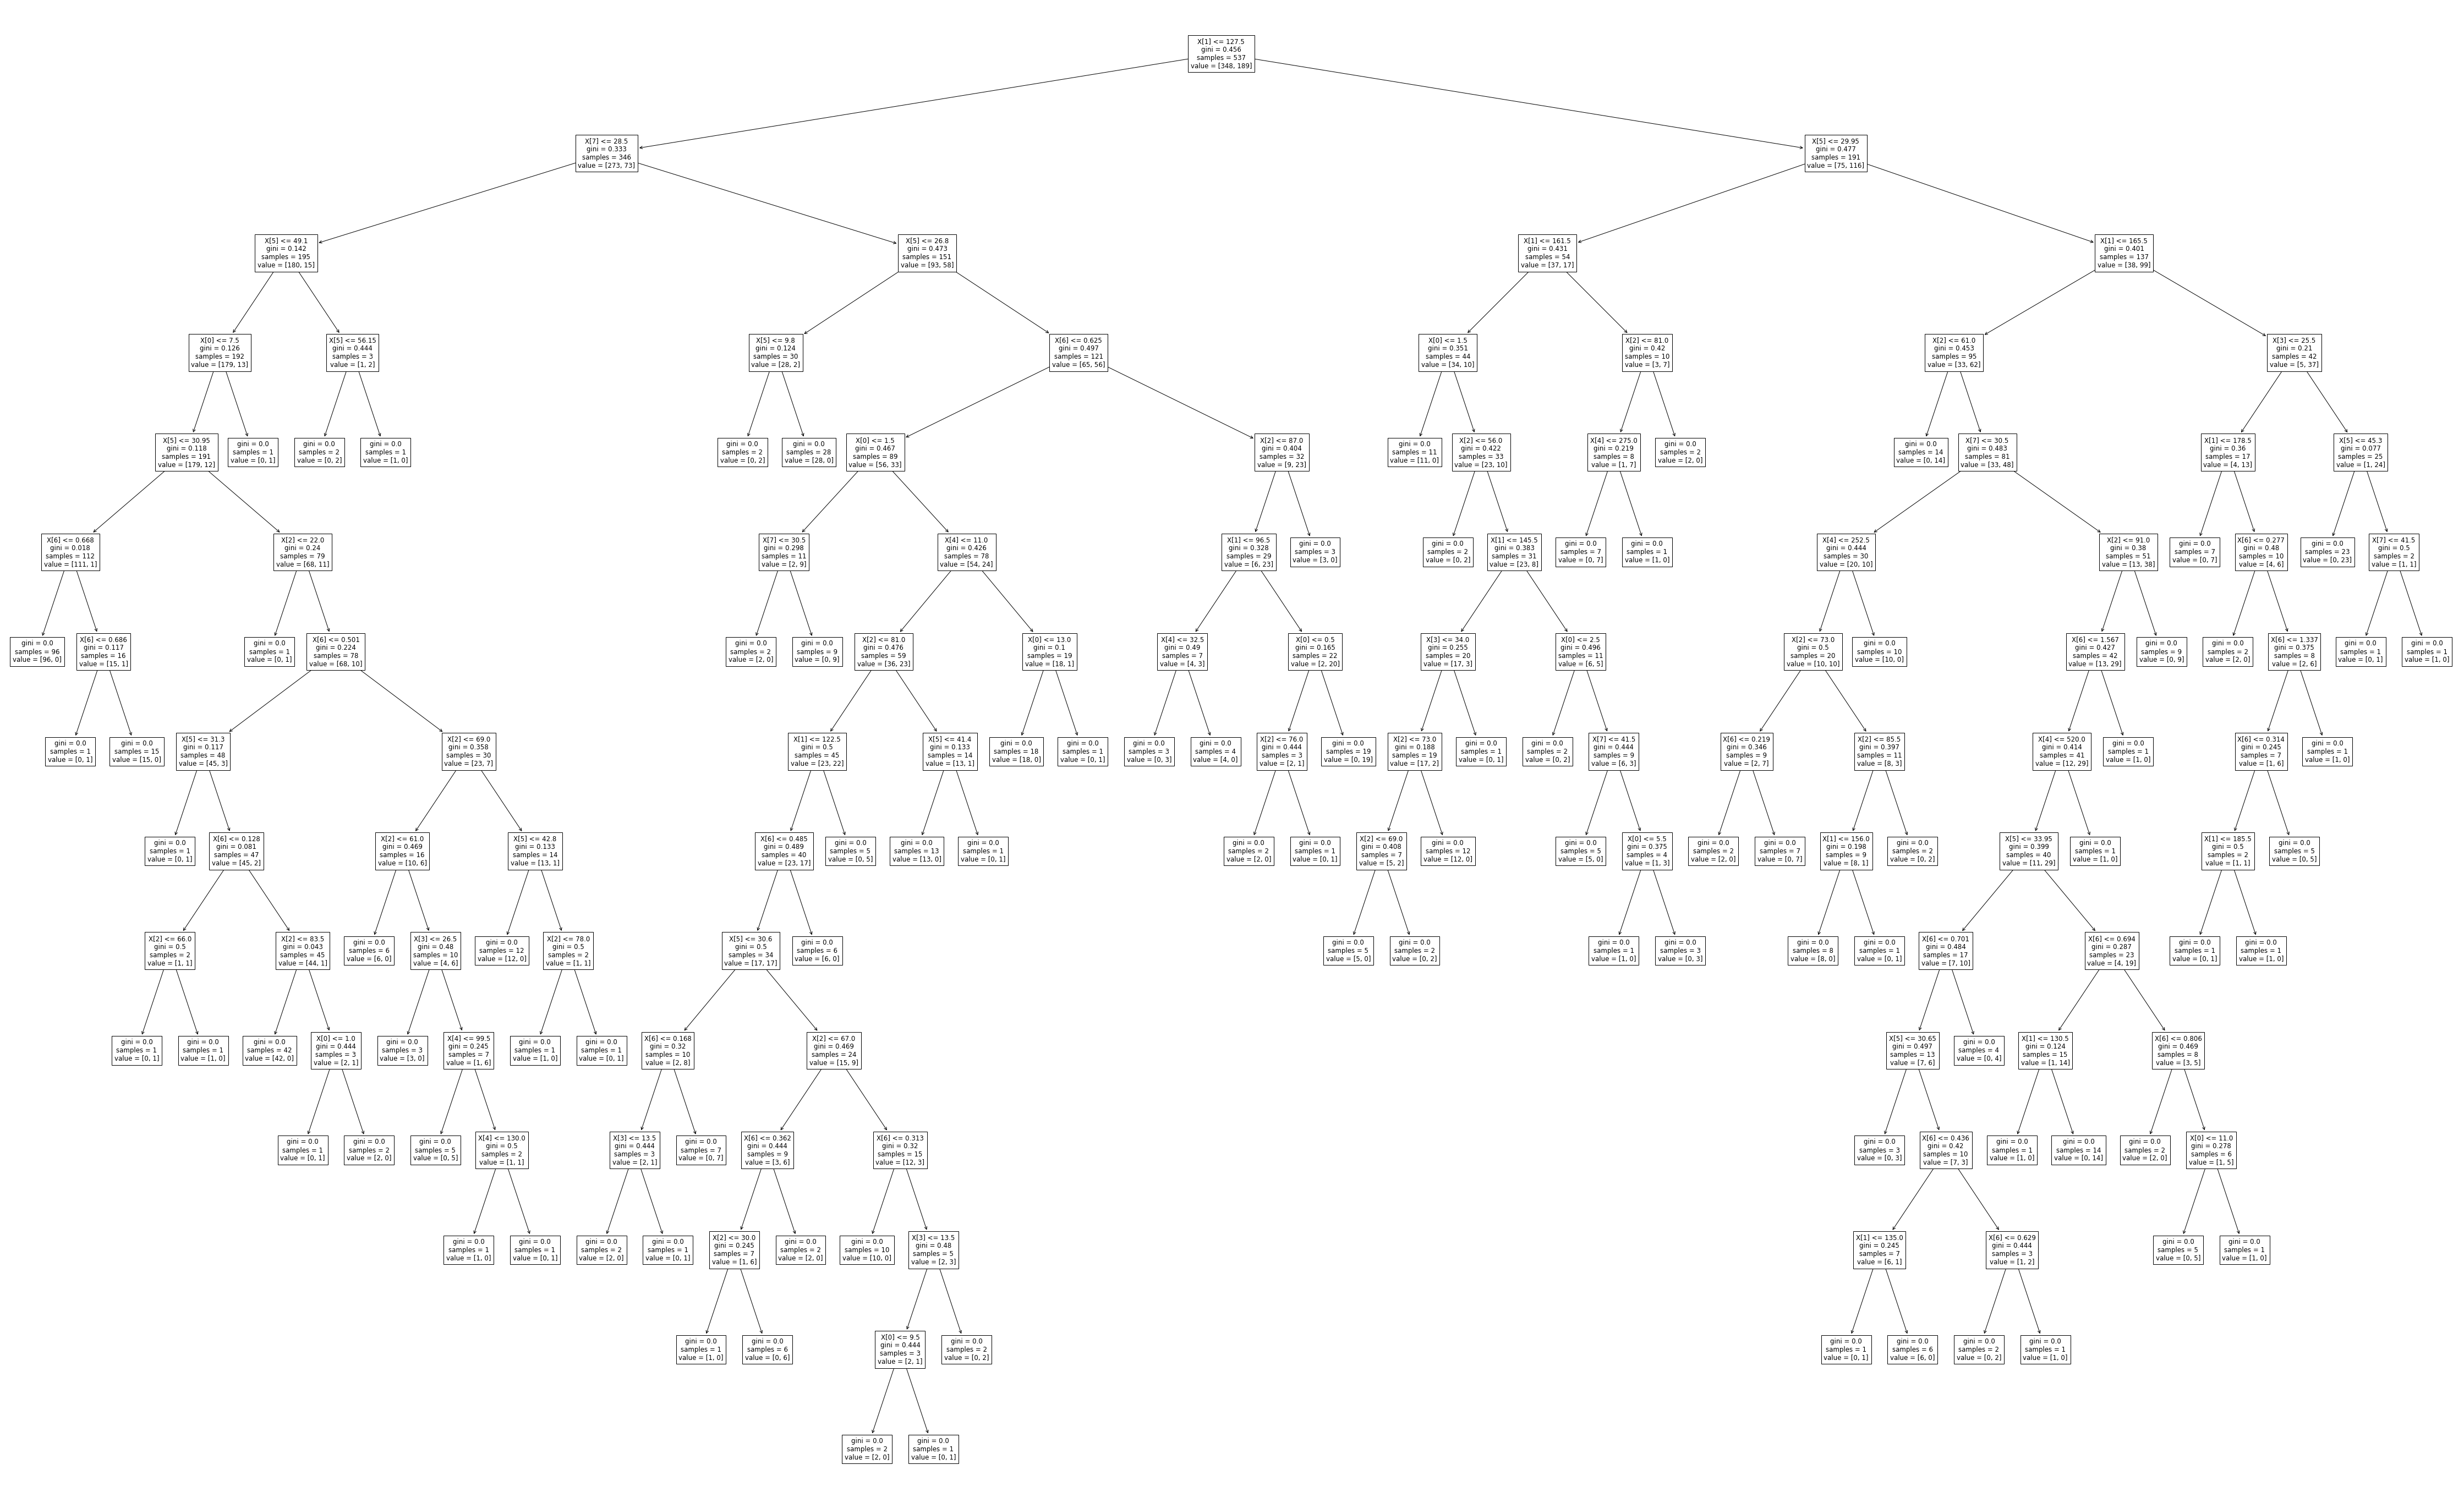

In [16]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 80,50

plot_tree(model1)

# Modelling with Hyper-parameter Tuning

In [17]:
# Model to find the best parameters

model2 = DecisionTreeClassifier(random_state=44)

In [18]:
#model2.fit(X_train, y_train)

In [19]:
param_dist = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : [1,2,3,4,5,6,7,8,None],
    "min_samples_split" : [2,3,4,5,6,7,8,9,10]
}

In [20]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(model2, param_grid = param_dist, cv=10, n_jobs=-1)

In [21]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=44),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, None],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [22]:
grid.best_score_

0.7525506638714186

In [23]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 7}

In [24]:
# Model using the best parameters

model3 = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_split= 7, random_state=111)

In [25]:
model3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=7, random_state=111)

In [26]:
y_pred = model3.predict(X_test)

In [27]:
accuracy_score(y_test, y_pred)

0.7705627705627706

[Text(1879.578947368421, 2491.5, 'X[1] <= 127.5\ngini = 0.456\nsamples = 537\nvalue = [348, 189]'),
 Text(792.9473684210526, 2038.5, 'X[7] <= 28.5\ngini = 0.333\nsamples = 346\nvalue = [273, 73]'),
 Text(469.89473684210526, 1585.5, 'X[5] <= 49.1\ngini = 0.142\nsamples = 195\nvalue = [180, 15]'),
 Text(352.42105263157896, 1132.5, 'X[0] <= 7.5\ngini = 0.126\nsamples = 192\nvalue = [179, 13]'),
 Text(234.94736842105263, 679.5, 'X[5] <= 30.95\ngini = 0.118\nsamples = 191\nvalue = [179, 12]'),
 Text(117.47368421052632, 226.5, 'gini = 0.018\nsamples = 112\nvalue = [111, 1]'),
 Text(352.42105263157896, 226.5, 'gini = 0.24\nsamples = 79\nvalue = [68, 11]'),
 Text(469.89473684210526, 679.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(587.3684210526316, 1132.5, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(1116.0, 1585.5, 'X[5] <= 26.8\ngini = 0.473\nsamples = 151\nvalue = [93, 58]'),
 Text(822.3157894736842, 1132.5, 'X[5] <= 9.8\ngini = 0.124\nsamples = 30\nvalue = [28, 2]'),
 Text(

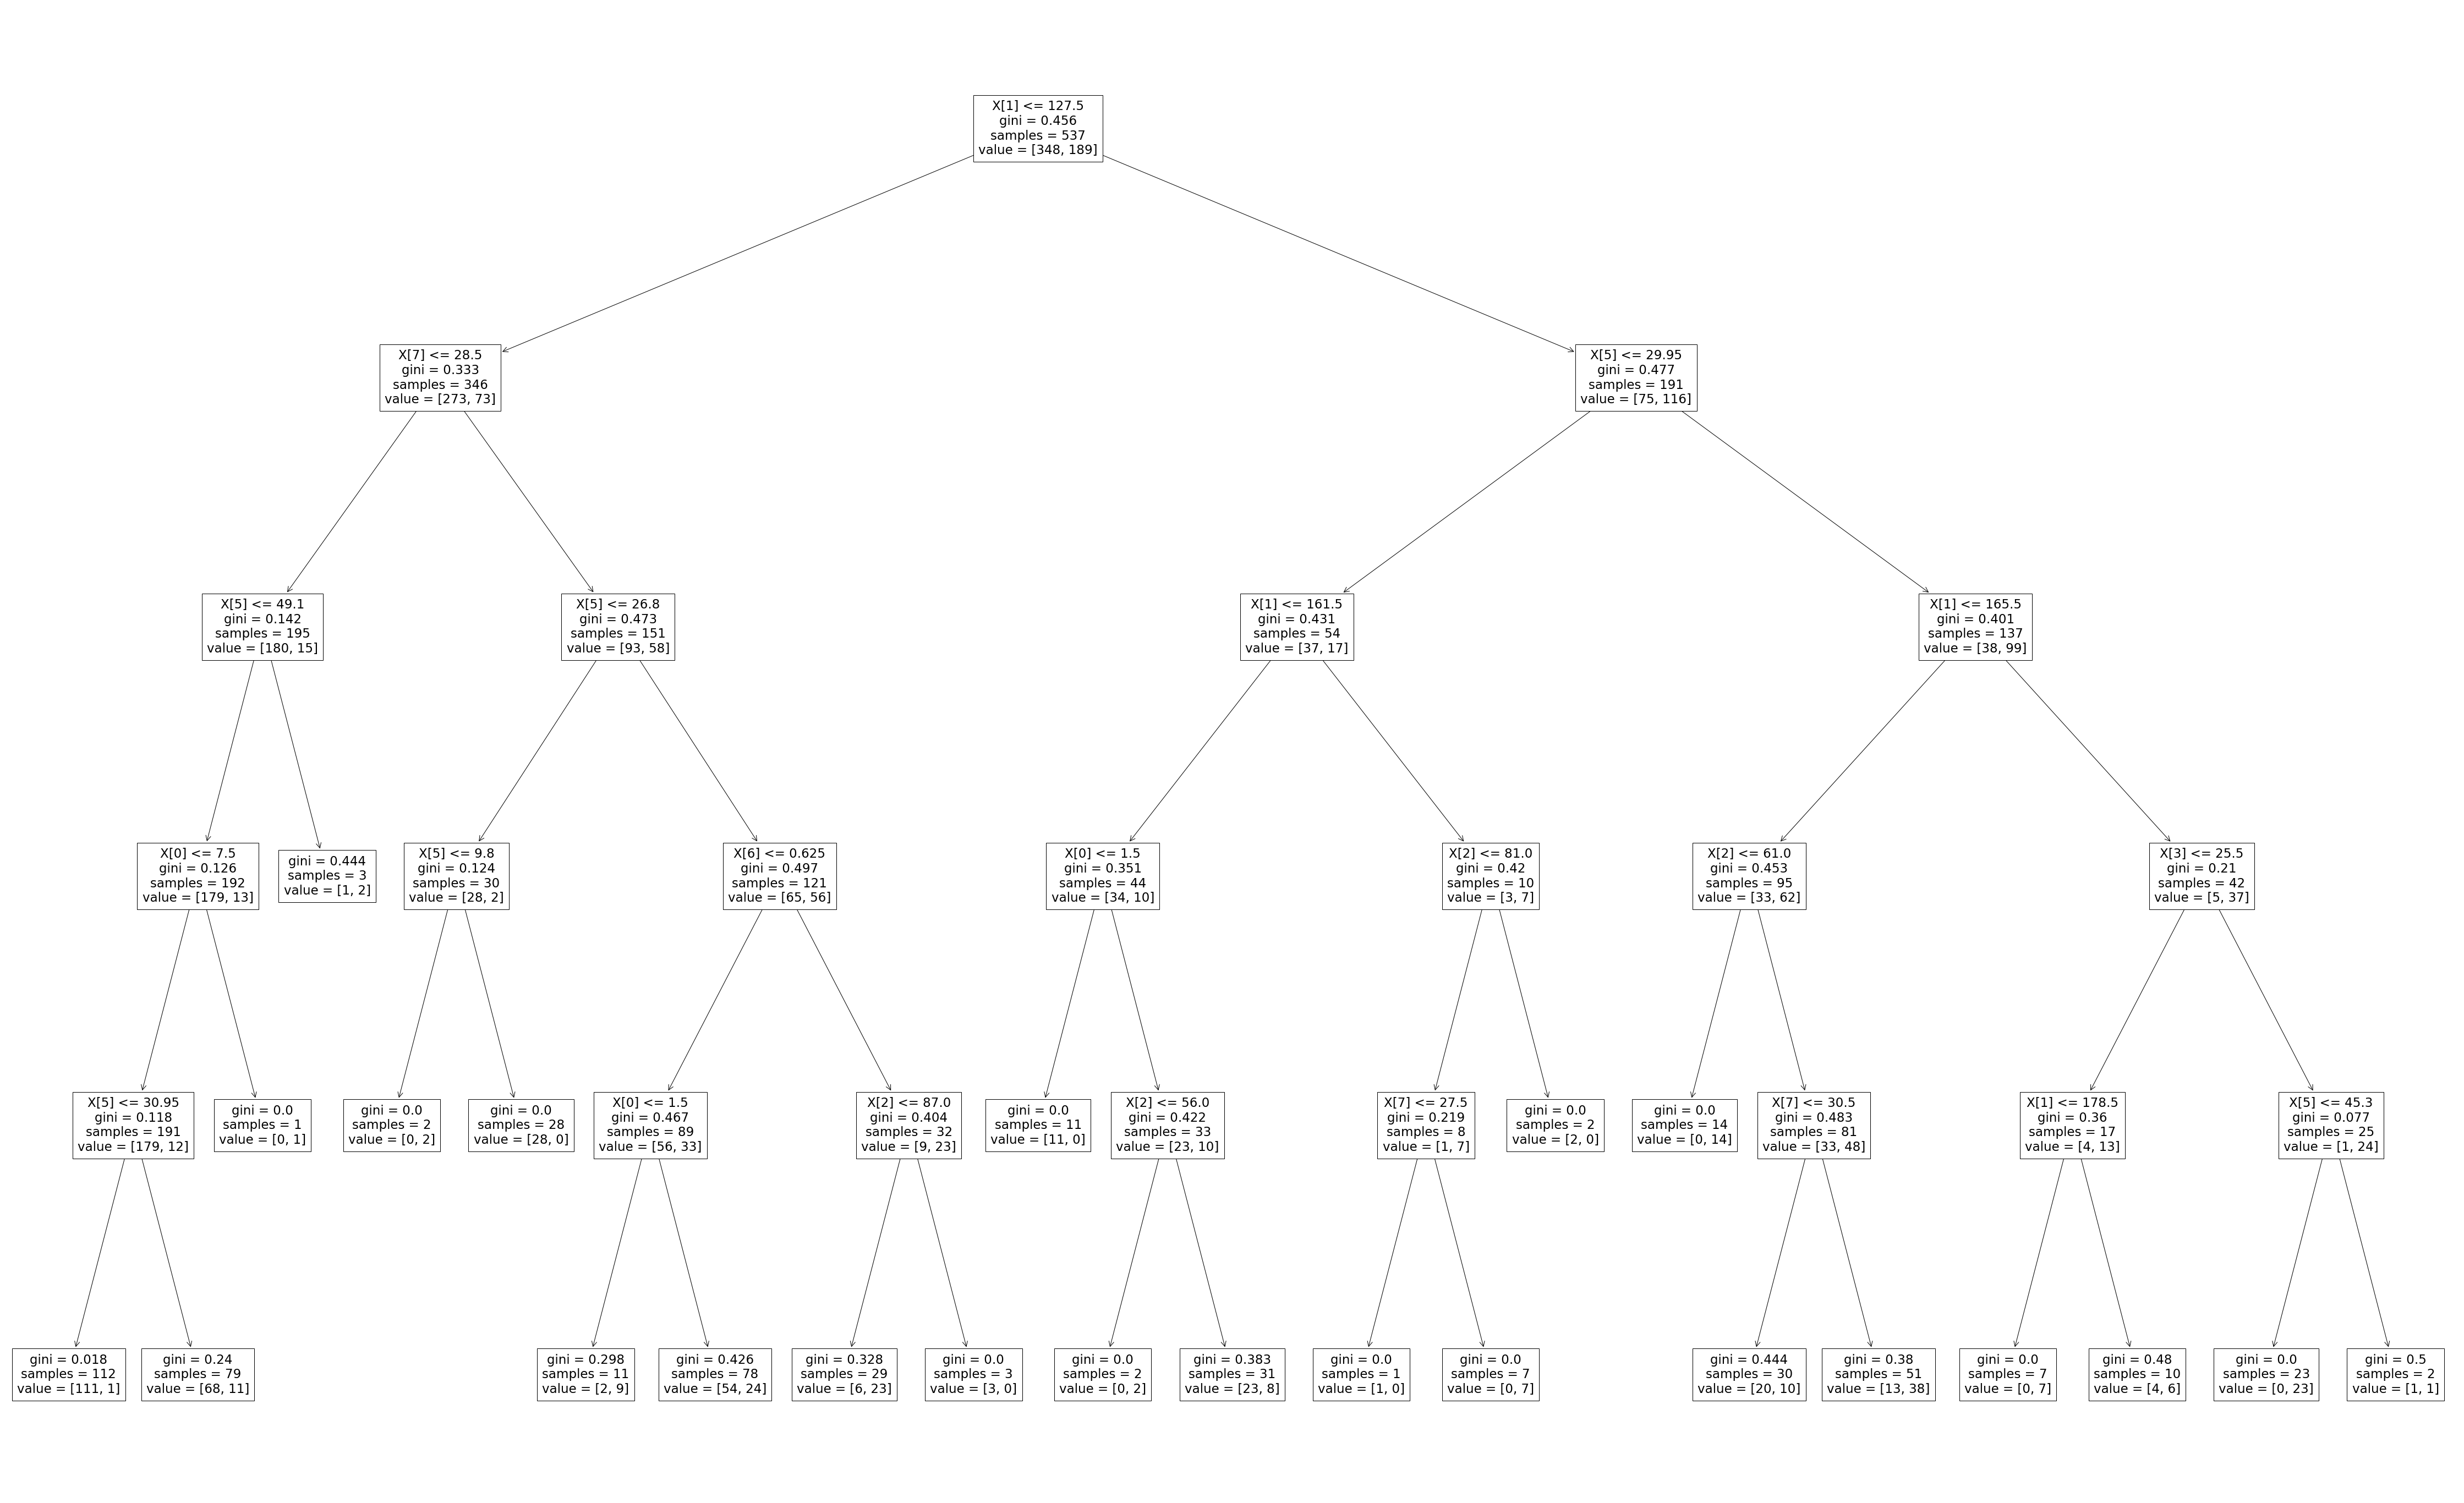

In [28]:
rcParams['figure.figsize'] = 80,50

plot_tree(model3)